# MNIST - Categorical Classification
- overfitting issue

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
import keras
from keras import models, layers, regularizers
from keras.datasets import mnist
from keras.utils import to_categorical

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

## 1. MNIST Dataset load & review

In [6]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


- Train_Data Information

In [8]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train.shape)
print(y_train[0:5])

60000
(60000, 28, 28)
60000
(60000,)
[5 0 4 1 9]


- Test_Data Information

In [9]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


## 2) Visualization

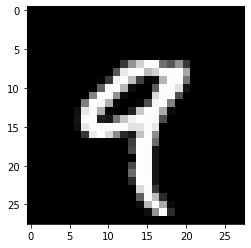

In [10]:
digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [13]:
np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

## 2. Data Preprocessing

### 1) Reshape and Normalization
- reshape
  - (60000, 28, 28) to (60000, 784)

In [11]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

- Normalization

In [12]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [13]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### 2) One Hot Encoding

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 3. MNIST Keras Modeling

### 1) Model Define
- 모델 신경망 구조 정의
  - 2개의 Hidden Layers & 768개의 Nodes
  - 복잡한 Model Capacity로 인한 Overfitting

(1) Case 1: Overfitting

In [16]:
mnist_1 = models.Sequential()

mnist_1.add(layers.Dense(512, activation = 'relu' , input_shape = (28 * 28, )))
mnist_1.add(layers.Dense(256, activation = 'relu'))
mnist_1.add(layers.Dense(10, activation = 'softmax'))

# overfitting issue 발생: model이 overspec일 수 있다

In [17]:
mnist_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


(2) Case 2: Layer 줄이기

In [18]:
mnist_2 = models.Sequential()

mnist_2.add(layers.Dense(256, activation = 'relu' , input_shape = (28 * 28, )))
mnist_2.add(layers.Dense(10, activation = 'softmax'))

In [19]:
mnist_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


(3) Case 3: L2 Regularization

In [20]:
mnist_3 = models.Sequential()

mnist_3.add(layers.Dense(512, activation = 'relu' ,
                         kernel_regularizer = regularizers.l2(0.00001),
                         input_shape = (28 * 28, )))
mnist_3.add(layers.Dense(256, activation = 'relu' ,
                         kernel_regularizer = regularizers.l2(0.00001)))
mnist_3.add(layers.Dense(10, activation = 'softmax'))

In [21]:
mnist_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


(4) Case 4: Dropout
- Capacity를 내리고 학습을 방해하는 형태
- Dropout 비율은 일반적으로 0.5 (통상적으로 가장 좋은 성능을 낸다)

In [22]:
mnist_4 = models.Sequential()

mnist_4.add(layers.Dense(512, activation = 'relu' , input_shape = (28 * 28, )))
mnist_4.add(layers.Dropout(0.4))
mnist_4.add(layers.Dense(256, activation = 'relu'))
mnist_4.add(layers.Dropout(0.2))
mnist_4.add(layers.Dense(10, activation = 'softmax'))

In [23]:
mnist_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


(5) Case5: Batch Normalization

In [24]:
mnist_5 = models.Sequential()

mnist_5.add(layers.Dense(512, input_shape = (28 * 28, )))
mnist_5.add(layers.BatchNormalization())
mnist_5.add(layers.Activation('relu'))
mnist_5.add(layers.Dense(256))
mnist_5.add(layers.BatchNormalization())
mnist_5.add(layers.Activation('relu'))
mnist_5.add(layers.Dense(10, activation = 'softmax'))

In [25]:
mnist_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

(6) Case6: Batch Normalization & L2 Normalization

In [35]:
mnist_6 = models.Sequential()

mnist_6.add(layers.Dense(512, input_shape = (28 * 28, ),
                         kernel_regularizer = regularizers.l2(0.00001)))
mnist_6.add(layers.BatchNormalization())
mnist_6.add(layers.Activation('relu'))
mnist_6.add(layers.Dense(256, kernel_regularizer= regularizers.l2(0.00001)))
mnist_6.add(layers.BatchNormalization())
mnist_6.add(layers.Activation('relu'))
mnist_6.add(layers.Dense(10, activation = 'softmax'))

In [36]:
mnist_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

(7) Case7: Batch Normalization & L2 Regularization

In [42]:
mnist_7 = models.Sequential()

mnist_7.add(layers.Dense(512, input_shape = (28 * 28, )))
mnist_7.add(layers.Dropout(0.5))
mnist_7.add(layers.BatchNormalization())
mnist_7.add(layers.Activation('relu'))
mnist_7.add(layers.Dense(256))
mnist_7.add(layers.Dropout(0.5))
mnist_7.add(layers.BatchNormalization())
mnist_7.add(layers.Activation('relu'))
mnist_7.add(layers.Dense(10, activation = 'softmax'))

In [43]:
mnist_7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)              

(8) Case8: Dropout & L2 Regularization

In [48]:
mnist_8 = models.Sequential()

mnist_8.add(layers.Dense(512, input_shape = (28 * 28, ),
                         activation = 'relu' ,
                         kernel_regularizer = regularizers.l2(0.00001)))
mnist_8.add(layers.Dropout(0.5))
mnist_8.add(layers.Dense(256, activation = 'relu' ,
                         kernel_regularizer = regularizers.l2(0.00001)))
mnist_8.add(layers.Dropout(0.5))
mnist_8.add(layers.Dense(10, activation = 'softmax'))

In [49]:
mnist_8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### 2) Model Compile
- 모델 학습방법 설정

In [26]:
mnist_1.compile(loss = 'categorical_crossentropy' ,
              optimizer = 'rmsprop' ,
              metrics = ['accuracy'])

In [27]:
mnist_2.compile(loss = 'categorical_crossentropy' ,
              optimizer = 'rmsprop' ,
              metrics = ['accuracy'])

In [28]:
mnist_3.compile(loss = 'categorical_crossentropy' ,
              optimizer = 'rmsprop' ,
              metrics = ['accuracy'])

In [29]:
mnist_4.compile(loss = 'categorical_crossentropy' ,
              optimizer = 'rmsprop' ,
              metrics = ['accuracy'])

In [30]:
mnist_5.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [37]:
mnist_6.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [44]:
mnist_7.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [50]:
mnist_8.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

### 3) Model Fit

In [ ]:
%%time

Hist_mnist_1 = mnist_1.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2) # 실제로 쓰지는 않을 것(지정해서 쓰는 것이 좋다)

In [ ]:
Hist_mnist_2 = mnist_2.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

In [ ]:
Hist_mnist_3 = mnist_3.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

In [ ]:
Hist_mnist_4 = mnist_4.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

In [ ]:
Hist_mnist_5 = mnist_5.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

In [ ]:
Hist_mnist_6 = mnist_6.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

In [45]:
Hist_mnist_7 = mnist_7.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.6273 - accuracy: 0.8119 - val_loss: 0.1649 - val_accuracy: 0.9521
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.2163 - accuracy: 0.9370 - val_loss: 0.1325 - val_accuracy: 0.9617
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1711 - accuracy: 0.9473 - val_loss: 0.1144 - val_accuracy: 0.9669
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1384 - accuracy: 0.9573 - val_loss: 0.1068 - val_accuracy: 0.9688
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1265 - accuracy: 0.9609 - val_loss: 0.0972 - val_accuracy: 0.9721
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1206 - accuracy: 0.9630 - val_loss: 0.0946 - val_accuracy: 0.9727
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1071 - accuracy: 0.9679 - val_loss: 0.0931 - val_accuracy: 0.9741

In [51]:
Hist_mnist_8 = mnist_8.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 0.6758 - accuracy: 0.7876 - val_loss: 0.1563 - val_accuracy: 0.9563
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2154 - accuracy: 0.9381 - val_loss: 0.1244 - val_accuracy: 0.9658
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1573 - accuracy: 0.9570 - val_loss: 0.1119 - val_accuracy: 0.9717
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1416 - accuracy: 0.9624 - val_loss: 0.1027 - val_accuracy: 0.9747
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1329 - accuracy: 0.9642 - val_loss: 0.1061 - val_accuracy: 0.9730
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1230 - accuracy: 0.9676 - val_loss: 0.1105 - val_accuracy: 0.9746
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1152 - accuracy: 0.9703 - val_loss: 0.1014 - val_accuracy: 0.9758

### 4) 학습결과 시각화
- Loss Visualization

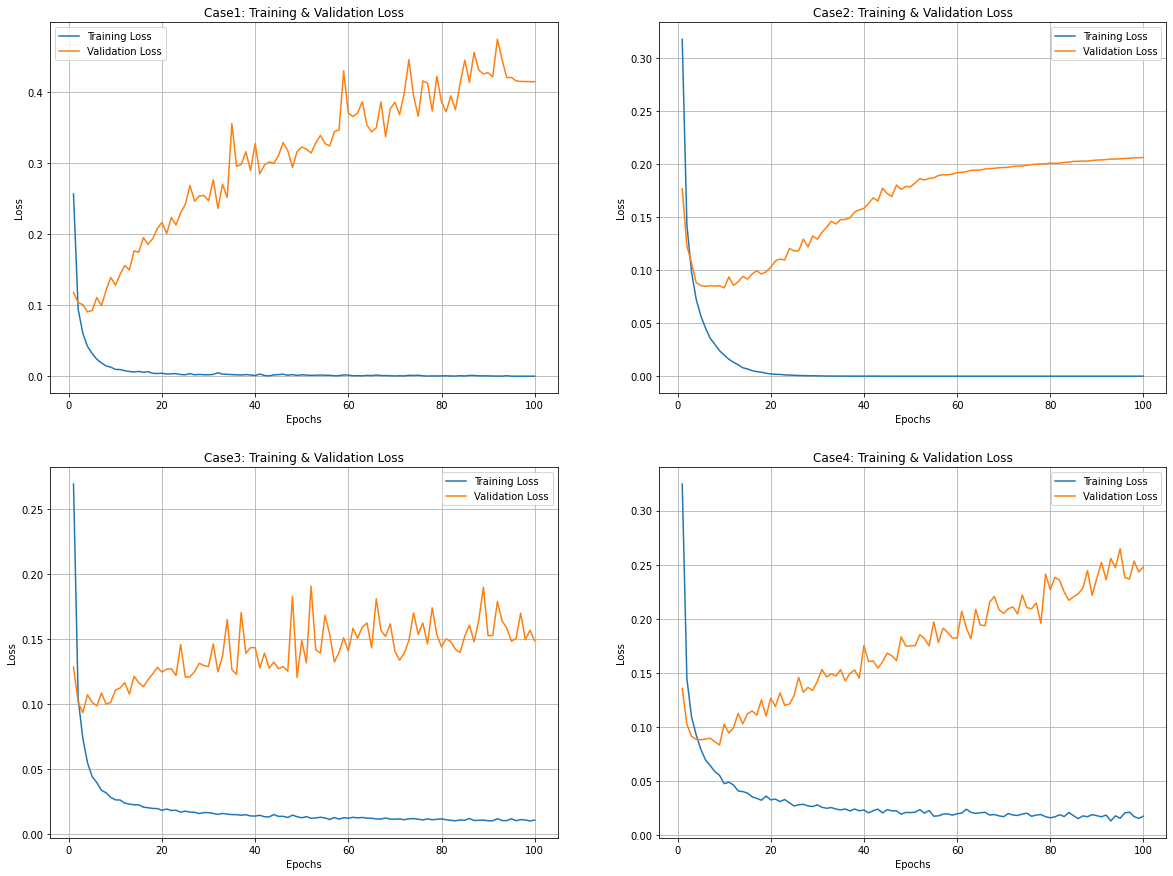

In [80]:



epochs = range(1, len(Hist_mnist_1.history['loss']) + 1)

plt.figure(figsize = (20, 15))

plt.subplot(2, 2, 1)
plt.plot(epochs, Hist_mnist_1.history['loss'])
plt.plot(epochs, Hist_mnist_1.history['val_loss'])
plt.title('Case1: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(epochs, Hist_mnist_2.history['loss'])
plt.plot(epochs, Hist_mnist_2.history['val_loss'])
plt.title('Case2: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(epochs, Hist_mnist_3.history['loss'])
plt.plot(epochs, Hist_mnist_3.history['val_loss'])
plt.title('Case3: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(epochs, Hist_mnist_4.history['loss'])
plt.plot(epochs, Hist_mnist_4.history['val_loss'])
plt.title('Case4: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.show()


# Overfitting 경향이 줄어든 것을 볼 수 있다!

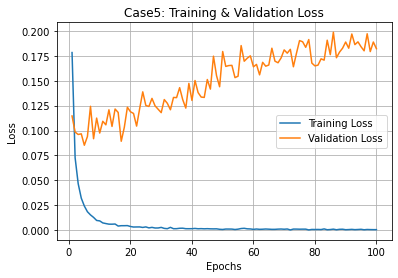

In [33]:
epochs = range(1, len(Hist_mnist_5.history['loss']) + 1)

plt.plot(epochs, Hist_mnist_5.history['loss'])
plt.plot(epochs, Hist_mnist_5.history['val_loss'])
plt.title('Case5: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

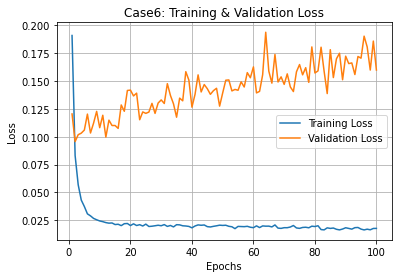

In [39]:
epochs = range(1, len(Hist_mnist_6.history['loss']) + 1)

plt.plot(epochs, Hist_mnist_6.history['loss'])
plt.plot(epochs, Hist_mnist_6.history['val_loss'])
plt.title('Case6: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

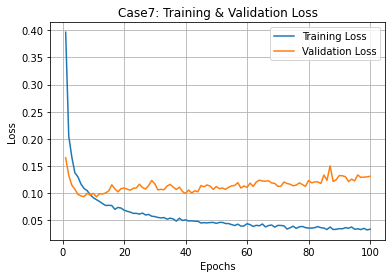

In [46]:
epochs = range(1, len(Hist_mnist_7.history['loss']) + 1)

plt.plot(epochs, Hist_mnist_7.history['loss'])
plt.plot(epochs, Hist_mnist_7.history['val_loss'])
plt.title('Case7: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

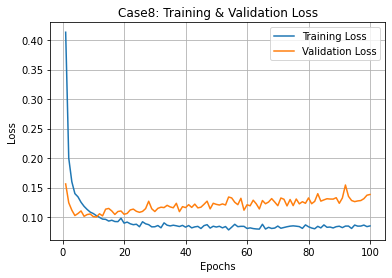

In [52]:
epochs = range(1, len(Hist_mnist_8.history['loss']) + 1)

plt.plot(epochs, Hist_mnist_8.history['loss'])
plt.plot(epochs, Hist_mnist_8.history['val_loss'])
plt.title('Case8: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

In [ ]:
# L2: 오차함수에 지속적으로 노이즈를 추가해주므로 Training Loss 가 일정 이상 내려가지 않는다

### 5) Model Evaluate
- Loss & Accuracy

In [65]:
loss, accuracy = mnist_1.evaluate(X_test, y_test)

print('Loss = {: .5f}' .format(loss))
print('Accuracy = {: .5f}' .format(accuracy))

# overfitting 경향은 줄었으나, 성능에 차이가 없는가?
# 동일한 성능을 낸다면 간단한 모델이 좋다

313/313 [==============================] - 1s 2ms/step - loss: 0.3405 - accuracy: 0.9830
Loss =  0.34053
Accuracy =  0.98300


In [66]:
loss, accuracy = mnist_2.evaluate(X_test, y_test)

print('Loss = {: .5f}' .format(loss))
print('Accuracy = {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1831 - accuracy: 0.9800
Loss =  0.18315
Accuracy =  0.98000


In [71]:
loss, accuracy = mnist_3.evaluate(X_test, y_test)

print('Loss = {: .5f}' .format(loss))
print('Accuracy = {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1404 - accuracy: 0.9789
Loss =  0.14035
Accuracy =  0.97890


In [81]:
loss, accuracy = mnist_4.evaluate(X_test, y_test)

print('Loss = {: .5f}' .format(loss))
print('Accuracy = {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.2033 - accuracy: 0.9829
Loss =  0.20330
Accuracy =  0.98290


In [34]:
loss, accuracy = mnist_5.evaluate(X_test, y_test)

print('Loss = {: .5f}' .format(loss))
print('Accuracy = {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1561 - accuracy: 0.9842
Loss =  0.15614
Accuracy =  0.98420


In [40]:
loss, accuracy = mnist_6.evaluate(X_test, y_test)

print('Loss = {: .5f}' .format(loss))
print('Accuracy = {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1639 - accuracy: 0.9806
Loss =  0.16392
Accuracy =  0.98060


In [47]:
loss, accuracy = mnist_7.evaluate(X_test, y_test)

print('Loss = {: .5f}' .format(loss))
print('Accuracy = {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1259 - accuracy: 0.9663
Loss =  0.12591
Accuracy =  0.96630


In [70]:
loss, accuracy = mnist_8.evaluate(X_test, y_test)

print('Loss = {: .5f}' .format(loss))
print('Accuracy = {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1362 - accuracy: 0.9805
Loss =  0.13618
Accuracy =  0.98050


### 6) Model Predict
- Probability

In [38]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1, :]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


- Class

In [39]:
print(mnist.predict_classes(X_test[:1, :]))

[7]


In [ ]:
# 랜덤 포레스트로도 할 수 있을까?
# 당연히 가능. 다만 성능이 좋은 모델이 있을 뿐